In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#read-in the data
df = pd.read_excel("Wind.xlsx")
df.head()
#np.shape(df)

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [3]:
#check for missing data
df_missing = df.isna()
#number of missing values per feature
missing_values = df_missing.sum()
#print(missing_values)
#percentage of missing values per feature using mean
percent_missing = df_missing.mean()
#print(percent_missing)
#df.loc[:,"RPT":"MAL"].isnull().sum()

In [4]:
#drop missing values since they has very small impact
df = df.dropna(how='any')   
np.shape(df)

(6546, 15)

In [5]:
#Loc_stats  = df.iloc[:,3:14].groupby(level=0).agg(['count','min','max','mean','std'])
df.iloc[:,3:14].describe()
#pd.options.display.max_columns = 55
#Loc_stats
#df['RPT'].groupby(df['Dy']).min()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL
count,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000
25%,8.120000,6.670000,7.970000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.670000
50%,11.710000,10.130000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.250000,12.500000
75%,15.920000,14.040000,14.670000,8.380000,13.540000,9.670000,12.960000,11.420000,11.170000,11.580000,16.880000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000


In [6]:
def stats(x):
    return pd.Series(index=['count','min','max','mean', 'std'], data=[x.count(), x.min(), x.max(), x.mean(), x.std()])
df.iloc[:,3:14].apply(stats)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL
count,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054


In [7]:
#Problem 4:
df2 = (df.set_index('Dy')
      .select_dtypes(np.number)
      .stack()
      .groupby(level=0)
      .agg(['min','max','mean', 'std']))
print(df2)

     min   max       mean        std
Dy                                  
1   0.17  78.0  14.449893  16.297315
2   0.00  78.0  14.335478  16.332495
3   0.00  78.0  13.929389  16.297893
4   0.00  78.0  13.854728  16.325364
5   0.13  78.0  14.098499  16.252140
6   0.00  78.0  14.013049  16.376049
7   0.04  78.0  14.084688  16.350071
8   0.04  78.0  13.916042  16.306232
9   0.00  78.0  14.342688  16.247415
10  0.00  78.0  14.453707  16.280173
11  0.00  78.0  14.498980  16.279406
12  0.00  78.0  14.446469  16.414775
13  0.04  78.0  13.904921  16.357016
14  0.21  78.0  14.310734  16.350862
15  0.17  78.0  14.062996  16.345125
16  0.00  78.0  14.255535  16.379691
17  0.04  78.0  14.321405  16.376140
18  0.04  78.0  14.132580  16.361459
19  0.17  78.0  14.174003  16.328237
20  0.08  78.0  14.071515  16.332394
21  0.00  78.0  13.824887  16.389282
22  0.13  78.0  14.005688  16.333971
23  0.00  78.0  14.433161  16.184422
24  0.08  78.0  14.294744  16.226919
25  0.17  78.0  14.373704  16.240932
2

In [8]:
#print(df.groupby(level=0).agg(['min','max','mean', 'std']))
#df.iloc[:,3:14].agg(['mean'])
functions = ['min','max','mean','std']

day_stats = df.groupby(['Yr','Mo','Dy']).sum()

day_stats.agg(['min','max','mean','std'],axis="columns").reset_index()

,level_0,level_1,level_2,min,max,mean,std
0,61,1,4,1.79,11.75,6.619167,3.198126
1,61,1,5,6.17,13.33,10.630000,2.445356
2,61,1,6,4.42,13.21,8.240000,2.998063
3,61,1,7,4.96,14.29,10.385000,3.072114
4,61,1,8,5.91,16.62,10.487500,3.547237
...,...,...,...,...,...,...,...
6541,78,12,27,8.08,40.08,16.708333,7.868076
6542,78,12,28,5.00,41.46,15.150000,9.687857
6543,78,12,29,8.71,29.58,14.890000,5.756836
6544,78,12,30,9.13,28.79,15.367500,5.540437


In [9]:
#Problem 5:
data_year  = df.iloc[:,3:14].groupby(df['Yr']).agg(['mean'])
data_year

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Yr,,,,,,,,,,,
61,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559
62,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691
63,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877
64,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546
65,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247
66,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836
67,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548
68,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634


In [10]:
#Problem 6:
diff=lambda x: x.max()-x.min()
data_year_limit = df.iloc[:,3:14].groupby(df['Yr']).apply(diff)
data_year_limit

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL
Yr,,,,,,,,,,,
61,25.87,23.08,30.58,20.67,26.29,19.84,24.37,20.79,20.84,25.13,27.91
62,35.13,30.76,31.88,24.12,32.00,24.21,28.12,26.67,25.43,27.29,29.21
63,31.67,25.46,29.54,20.08,26.12,19.82,24.59,21.84,21.79,24.91,32.78
64,31.47,26.75,27.25,28.13,23.08,20.29,22.33,25.38,18.25,23.71,35.45
65,29.38,32.29,31.42,22.17,36.29,26.16,28.75,30.50,25.01,26.12,37.00
66,32.58,31.99,27.29,23.92,33.13,26.04,29.95,30.71,24.91,23.54,38.75
67,27.34,25.96,28.17,18.21,24.63,20.25,26.00,25.83,20.83,23.04,36.92
68,29.08,30.25,29.88,19.42,27.46,19.71,24.16,27.88,22.21,22.92,33.43
69,27.12,26.79,30.54,16.79,22.21,17.88,27.50,21.67,21.54,20.25,30.30


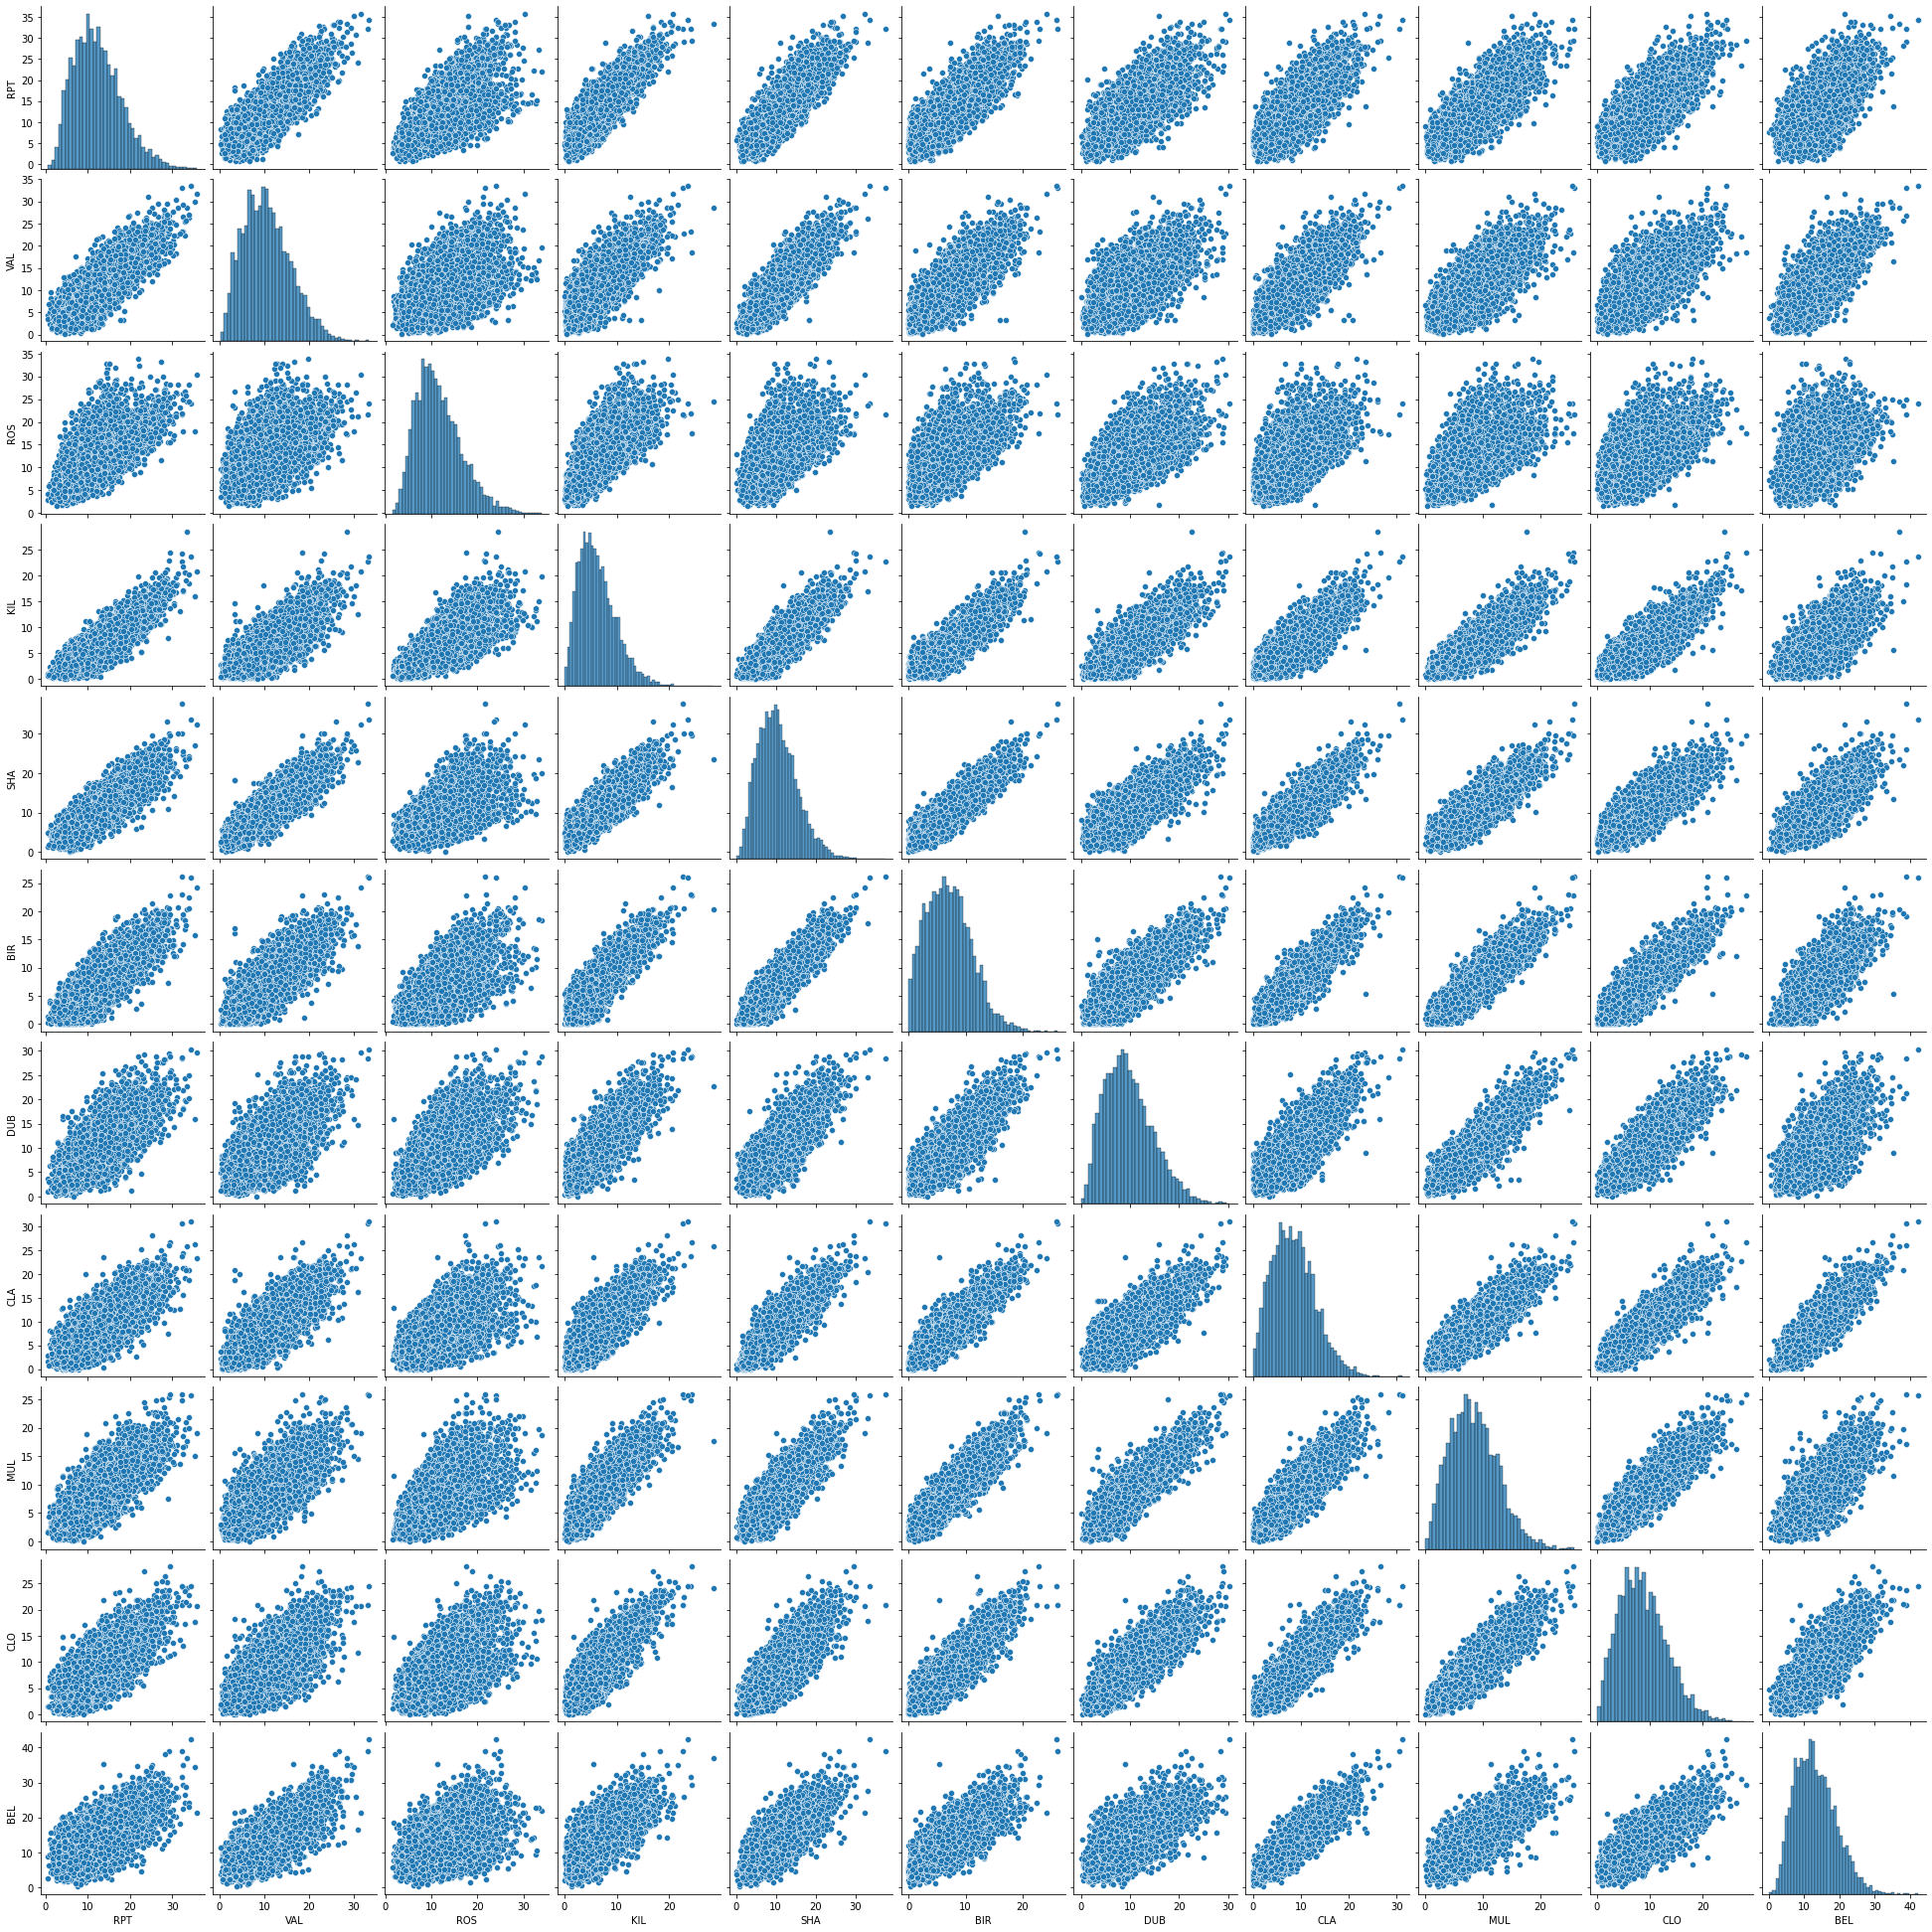

In [11]:
#plt.matshow(df.iloc[:,3:14].corr())
#plt.show()
sns.pairplot(data=df.iloc[:,3:14])

In [12]:
#Problem 8:
#df.unstack()
#df.unstack().reset_index() 
#pivoted = df.pivot('Yr','Mo','Dy')\
#pd.DataFrame(df.unstack().reset_index())
idx =['Yr','Mo','Dy']
multi_indexed_df = df.set_index(idx)
multi_indexed_df.head(55)

RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
Yr Mo Dy                                                                  
61 1  4   10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   
      5   13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92   
      6   13.21   8.12   9.96   6.67   5.37   4.50  10.67   4.42   7.17   
      7   13.50  14.29   9.50   4.96  12.29   8.33   9.17   9.29   7.58   
      8   10.96   9.75   7.62   5.91   9.62   7.29  14.29   7.62   9.25   
      9   12.58  10.83  10.00   4.75  10.37   6.79   8.04  10.13   7.79   
      10  13.37  11.12  19.50   8.33   9.71   6.54  11.42   7.79   8.54   
      11  10.58   9.87   8.42   2.79   8.71   7.25   7.54   8.33   5.71   
      12  19.75  12.08  18.50  10.54  10.29   9.46  15.54  11.50  10.37   
      13   9.92   3.54   8.46   2.96   2.29   0.96   4.63   0.58   2.33   
      14   9.04   5.66   7.08   0.67   2.71   1.38   3.08   2.58   0.50   
      15  12.04   9.67  11.75   2.37   7.38   3.13   2.50   6.83   4.75   
      16  16.42  11.25  15.67   4.71  11.34   6.92   9.25   8.79   8.21   
      17  17.75  14.37  17.33  10.13  13.96  13.37  13.42  11.04   8.71   
      19   4.92   3.42   7.29   1.04   3.67   3.17   3.71   2.79   1.92   
      20   9.59  11.83   7.96   1.58   7.92   5.00   3.17   4.92   3.13   
      21  14.33  10.25  11.92   6.13  10.04   7.67   8.04   9.17   7.04   
      22   9.59   5.88   9.92   2.17   6.87   5.50   9.38   7.04   6.34   
      23  16.54   9.96  18.54  10.46  13.50  12.67  13.70  13.75  10.75   
      24  25.04  14.83  25.84  15.67  21.46  18.58  20.38  19.38  15.37   
      25  13.62  11.17  12.67   6.04  10.00   9.42   9.25   8.71   7.12   
      26  24.37  18.79  17.50  14.25  18.91  15.67  14.33  15.16  16.08   
      27  22.04  20.79  17.41  16.21  19.04  16.13  16.79  18.29  18.66   
      28  17.67  13.54  13.33   8.87  15.04  11.63  12.25  10.58  11.92   
      30  12.21  11.42  10.92   7.92  13.08   9.62  14.50  10.21   9.92   
      31  24.21  19.55  16.71  11.96  14.42  10.46  14.88   8.21  10.50   
   2  1   14.25  15.12   9.04   5.88  12.08   7.17  10.17   3.63   6.50   
      2   20.17  24.21  10.00   6.54  17.37   7.17  10.88   6.08   9.08   
      3   14.37  11.71  11.04   5.09   9.87   5.83   8.50   5.13   6.34   
      4   10.58   9.46  10.92   8.71  12.46  11.46  12.54  11.04  13.04   
      5   22.00  16.75  19.70  11.63  14.25  12.04  13.96  15.54  13.37   
      6   24.50  20.75  20.62  15.37  25.33  17.62  19.17  18.79  18.96   
      7   18.05  14.37  14.88   9.75  10.96  11.17  14.21   9.71  13.04   
      8   24.54  21.42  21.34  11.63  17.04  14.21  16.50  17.33  14.67   
      9   17.41  15.92  13.67  10.71  14.00  12.92  14.37  15.71  14.46   
      10  20.50  11.54  19.67  10.04   8.12   8.08  11.08  12.54  11.12   
      11  16.79  14.00  13.70   9.54  15.83  13.29  17.50  15.50  15.83   
      12  16.00  16.92  17.25   8.38  11.75  10.37  11.71  14.37  10.37   
      13  22.50  19.70  19.41  15.34  16.13  14.62  16.08  14.12  13.96   
      14  17.08  11.63  17.25  12.12  13.75  13.46  15.46  12.29  14.88   
      15   6.04  12.08   6.13   4.21   9.87   6.92   5.17   7.41   8.17   
      16  16.79  20.17  12.67  13.25  15.29  15.12   3.42  14.29  14.79   
      17  15.25  14.09  14.75   9.54  14.62  12.92   6.17  12.58  13.25   
      18  12.08  12.38  12.67   6.04  10.71   9.08  10.88  12.38  10.00   
      20  11.04  11.08  10.63   8.33  10.92   8.29   7.25   7.75   8.83   
      21   7.79   8.63   6.08   2.21   7.41   4.33   3.75   7.04   4.50   
      22  12.29  13.21  13.54   6.46  11.58   9.21   8.25  10.29   9.21   
      23  22.08  17.46  18.88  12.42  20.50  16.13  16.38  16.92  13.21   
      24   8.71   7.08  11.38   4.83   5.96   4.58   8.17   4.67   6.21   
      25  18.84  16.42  17.41  10.21  16.13  11.38  13.08  12.21  12.33   
      26  25.80  21.50  22.42  15.21  23.09  16.88  21.17  17.25  18.46   
      27  11.00  13.37  11.17   6.87 

In [13]:
df.melt(id_vars=['Yr', 'Mo', 'Dy'])

,Yr,Mo,Dy,variable,value
0,61,1,4,RPT,10.58
1,61,1,5,RPT,13.33
2,61,1,6,RPT,13.21
3,61,1,7,RPT,13.50
4,61,1,8,RPT,10.96
...,...,...,...,...,...
78547,78,12,27,MAL,40.08
78548,78,12,28,MAL,41.46
78549,78,12,29,MAL,29.58
78550,78,12,30,MAL,28.79


<AxesSubplot:>

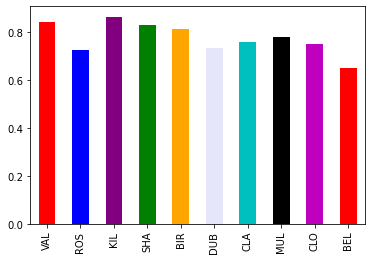

In [18]:
#Problem 9:
data_corr = df.iloc[:,3:14].corr()
#data_corr
data_corr_PRT = data_corr.iloc[0,1:]
data_corr_PRT.plot.bar(color=['red', 'blue', 'purple', 'green', 'orange','lavender','c','k','m'])